# Projeto de Análise e Previsão de Pontualidade de Voos - GOL

## Introdução

Este projeto foi desenvolvido como parte de um processo seletivo para a posição de Especialista de Dados na GOL Linhas Aéreas. O trabalho está focado em resolver dois desafios principais que envolvem análise de dados e otimização de recursos, ambos fundamentais para apoiar a tomada de decisões estratégicas da empresa.

O **primeiro desafio** envolve a análise e previsão da pontualidade dos voos da GOL ao longo do ano de 2018, utilizando dados disponibilizados pela Agência Nacional de Aviação Civil (ANAC). A pontualidade é um fator crucial para o setor de aviação, impactando diretamente a experiência dos passageiros e a eficiência operacional das companhias aéreas. Garantir que os voos cheguem ao seu destino de maneira pontual é fundamental para a GOL, e, por isso, este projeto visa não apenas explorar os dados, mas também fornecer previsões que auxiliem na melhoria contínua do desempenho operacional.

O **segundo desafio** envolve a formulação de um problema de otimização, focado na compra de novas aeronaves, de modo a maximizar o lucro da GOL, respeitando restrições de orçamento, manutenção e capacidade dos recursos humanos. Esse problema busca encontrar a composição ideal da frota, considerando o impacto econômico de cada tipo de aeronave e suas respectivas capacidades.

O estudo foi estruturado em duas etapas principais:

1. **Análise Exploratória dos Dados (EDA)** e Pré-Processamento: Investigação inicial dos dados para entender suas características, identificar padrões e realizar comparações de pontualidade entre a GOL e seus concorrentes principais (Azul e LATAM). Além disso, foram aplicados filtros específicos para selecionar apenas voos nacionais das principais companhias, de modo a adequar a análise ao que foi solicitado pela GOL.
   
2. **Implementação de Modelo de Classificação**: Desenvolvimento de um modelo preditivo para identificar se um voo específico irá atrasar, com base nos dados de 2018. Esta etapa inclui ajustes de hiperparâmetros e análise de importância das variáveis, utilizando técnicas como SHAP para interpretar melhor o comportamento do modelo.

## Abordagem e Metodologia

Para resolver ambos os desafios, foi utilizada uma abordagem estruturada que parte da **coleta e preparação dos dados**, seguida pela **análise exploratória** e **modelagem preditiva**, culminando na **formulação de um problema de otimização**. Cada etapa foi planejada considerando as melhores práticas de ciência de dados e análise de negócios.

- **Coleta de Dados**: Os dados foram extraídos da base aberta de Voos Regulares Ativos (VRA) da ANAC, abrangendo o ano de 2018. Além disso, foram utilizados dados auxiliares de aeródromos para identificar quais voos eram exclusivamente nacionais, facilitando o foco nas operações dentro do território brasileiro.

- **Exploração e Pré-Processamento**: Diversos filtros foram aplicados nos dados, incluindo a seleção de voos de companhias específicas (GOL, Azul, LATAM), o uso de dados de aeródromos para isolar voos nacionais, e a conversão de horários para um formato de data consistente, focando no período completo de 2018.

- **Formulação de Hipóteses e Premissas**: Antes de aplicar os modelos, foram estabelecidas algumas premissas sobre o comportamento esperado dos dados, como a influência dos horários de pico na pontualidade e o impacto da estação do ano na previsão de atrasos. Essas premissas ajudaram a guiar o pré-processamento e a análise exploratória, garantindo um entendimento profundo do problema antes mesmo de iniciar a modelagem.

- **Modelo de Classificação**: O modelo preditivo foi ajustado utilizando técnicas de otimização de hiperparâmetros e o limiar de decisão foi adaptado para maximizar métricas de performance específicas, como o recall, que é especialmente importante para prever atrasos de maneira eficaz.

- **Problema de Otimização**: Em paralelo ao trabalho de previsão de pontualidade, foi desenvolvida uma formulação de otimização para a compra de aeronaves. Este problema foi formulado como um modelo de programação linear, com o objetivo de maximizar o lucro, respeitando as restrições de orçamento, capacidade de manutenção e necessidade de otimização da frota.

## Descrição das Variáveis

Os dados utilizados no projeto contêm variáveis fundamentais que permitem uma análise detalhada da operação dos voos. Aqui estão as principais:

| Coluna                   | Tipo de Dado | Descrição                                                                                                   |
|--------------------------|--------------|-------------------------------------------------------------------------------------------------------------|
| **ICAO Empresa Aérea**   | `object`     | Código ICAO da companhia aérea que opera o voo (ex.: GLO, TAM, AZU).                                        |
| **Número Voo**           | `object`     | Identificação numérica do voo. Pode ter múltiplas ocorrências para voos diferentes ao longo do tempo.       |
| **ICAO Aeródromo Origem**| `object`     | Código ICAO do aeródromo de origem do voo (aeroporto de partida).                                          |
| **ICAO Aeródromo Destino** | `object`   | Código ICAO do aeródromo de destino do voo (aeroporto de chegada).                                         |
| **Partida Prevista**     | `datetime`   | Horário previsto de partida do voo (em formato de data e hora).                                           |
| **Partida Real**         | `datetime`   | Horário real de partida do voo (em formato de data e hora).                                               |
| **Chegada Prevista**     | `datetime`   | Horário previsto de chegada do voo (em formato de data e hora).                                           |
| **Chegada Real**         | `datetime`   | Horário real de chegada do voo (em formato de data e hora).                                               |
| **Situação Voo**         | `object`     | Indica se o voo está confirmado, cancelado ou não informado.                                              |
| **Código Justificativa** | `object`     | Código de justificativa para situações de voo não conformes, como atrasos e cancelamentos.                |

## Premissas do Projeto

1. **Companhias Selecionadas**: O estudo considerou apenas dados das três principais companhias aéreas brasileiras: GOL, Azul (AZU) e LATAM (TAM).
2. **Voos Nacionais**: Apenas voos domésticos foram incluídos na análise. Foi utilizado um glossário de aeródromos para identificar aqueles situados no Brasil e garantir a filtragem correta dos voos de interesse.
3. **Classificação de Pontualidade**: A definição de voo pontual ou atrasado foi baseada na diferença entre a partida real e a partida prevista, considerando uma tolerância de 15 minutos:
   - **Voo Atrasado**: Partida Real > Partida Prevista + 15 minutos.
   - **Voo Pontual**: Partida Real <= Partida Prevista + 15 minutos.
4. **Indicador de Pontualidade**: A taxa de pontualidade foi calculada como:

   $$
   \text{Pontualidade} = 1 - \frac{\text{Voos Atrasados}}{\text{Voos Realizados}}
   $$
---

## Coleta e Filtragem Inicial dos Dados

Para garantir que a análise estivesse alinhada com os objetivos definidos, foram coletados e preparados dados dos voos de 2018 das principais companhias aéreas brasileiras. Esta etapa inicial envolveu a combinação dos dados de múltiplos arquivos CSV e a aplicação de filtros importantes para definir o escopo da análise.

#### Passo 1: Obtenção dos Dados

Os dados dos voos foram coletados a partir de vários arquivos CSV disponibilizados pela ANAC. Cada arquivo contém informações de voos realizados no ano de 2018 e foram combinados em um único DataFrame para que a análise fosse completa e consistente.

---

In [ ]:
import pandas as pd
import os

directory = "/content/drive/MyDrive/vra_2018"

dfs = []

# Itera sobre todos os arquivos no diretório especificado
for filename in os.listdir(directory):
  if filename.endswith(".csv"):
    file_path = os.path.join(directory, filename)
    df = pd.read_csv(file_path, encoding='ISO-8859-1', delimiter=';')
    dfs.append(df)

# Concatena todos os DataFrames na lista 'dfs' em um único DataFrame
df_final = pd.concat(dfs, ignore_index=True)

df_aerodromo = pd.read_csv("/content/drive/MyDrive/dados_auxiliares/glossario_de_aerodromo.csv", encoding='ISO-8859-1', delimiter=';')


### Passo 2: Aplicação dos Filtros e Limpeza dos Dados

Nesta etapa, foram aplicados filtros específicos e realizadas diversas operações de limpeza nos dados para garantir que o conjunto estivesse pronto para análise posterior. O objetivo foi garantir que o conjunto de dados estivesse focado exclusivamente nos voos nacionais das principais companhias aéreas brasileiras (GOL, Azul, e LATAM), e que colunas redundantes ou valores problemáticos fossem devidamente tratados.

#### Motivação

A preparação adequada dos dados é crucial para assegurar que os resultados da análise sejam precisos e relevantes. Para isso, foram aplicados filtros para remover registros desnecessários, padronizar colunas e garantir a qualidade do conjunto de dados antes de avançar para a agregação e análise exploratória.

#### Etapas de Filtro e Limpeza

1. **Filtragem dos Voos de Interesse**: Inicialmente, os dados foram filtrados para incluir apenas voos das companhias GOL, Azul e LATAM. Esta seleção foi feita para focar a análise na comparação direta entre as principais concorrentes da GOL, permitindo uma visão mais precisa da pontualidade.

2. **Identificação dos Voos Nacionais**: Utilizando um glossário de aeródromos, foi possível identificar quais voos tinham tanto a origem quanto o destino em aeroportos brasileiros. Assim, foram removidos todos os registros que não representavam voos puramente domésticos.

3. **Conversão de Horários para Formato de Data**: Para permitir análises temporais, as colunas de horários de partida e chegada foram convertidas para o formato `datetime`, facilitando tanto a manipulação dos dados quanto a extração de informações temporais.

4. **Filtragem dos Voos de 2018**: Apenas os registros de voos ocorridos no ano de 2018 foram mantidos, conforme solicitado no escopo do projeto.

5. **Remoção da "Código Justificativa"**: Remoção da coluna "Código Justificativa", conforme solicitado no escopo do projeto.

6. **Criação da Coluna 'Mês'**: A coluna **'Mês'** foi criada para permitir análises agregadas por mês, facilitando a visualização de padrões sazonais nos atrasos.

7. **Remoção de Voos Cancelados**: Voos cancelados foram removidos do conjunto de dados, uma vez que não ocorreram e, portanto, não contribuiriam para a análise de pontualidade. Esta decisão foi tomada para evitar distorções nos cálculos, garantindo que apenas voos realizados fossem considerados.

8. **Preparação da Coluna 'Código DI'**:

   Durante a análise inicial dos dados, foi observado que a coluna **'Código DI'** apresentava duplicidade. Em alguns arquivos do ano de 2018, a coluna foi carregada como **'Código DI'**, enquanto em outros apareceu como **'Código Autorização (DI)'**. Essa inconsistência precisava ser resolvida para garantir uma análise consistente.

   Para resolver essa questão, foram realizadas as seguintes etapas:

   - **Unificação das Colunas**: As duas colunas foram combinadas em uma única coluna chamada **'Código DI'**. Para isso, os valores ausentes em uma coluna foram preenchidos utilizando os valores disponíveis na outra. Dessa forma, garantiu-se que todos os registros tivessem a informação consolidada.
   
   - **Remoção de Duplicidade**: Após a unificação, a coluna **'Código Autorização (DI)'** foi removida do conjunto de dados, evitando redundância.
   
   - **Padronização dos Valores**: Foi observado que os valores da coluna **'Código DI'** estavam em formato `float` (ex.: `1.0`), embora representassem códigos inteiros. Para padronizar, todos os valores foram arredondados e convertidos para inteiros, garantindo a consistência da variável.
   
   - **Tratamento de Valores Ausentes**: Ao final, os valores ausentes em **'Código DI'** foram preenchidos com a categoria **'99'**. Essa categoria foi escolhida para representar uma situação específica onde não havia informações disponíveis, evitando problemas durante a modelagem.

9. **Criação da Coluna 'Atraso'**: Uma nova coluna chamada 'Atraso' foi adicionada ao conjunto de dados para indicar se um voo estava atrasado (1) ou não (0). A regra utilizada foi definir como atrasado um voo cuja Partida Real ocorresse mais de 15 minutos após a Partida Prevista. Essa abordagem binária está alinhada com o objetivo de desenvolver um modelo de classificação que será capaz de prever se um voo irá atrasar ou não, simplificando a tarefa de categorização e contribuindo para a clareza do problema


Essas etapas de filtragem e limpeza dos dados garantiram que o conjunto estivesse consistente e preparado para a próxima fase, que envolve a agregação de informações para iniciar a análise exploratória.

In [ ]:
# Filtrar voos das empresas GOL, Azul e LATAM
df_filtrado = df_final[df_final['ICAO Empresa Aérea'].isin(["GLO", "AZU", "TAM"])]

# Obter os aeródromos brasileiros a partir do df_aerodromo
aerodromos_br = df_aerodromo[df_aerodromo['País'] == 'BRASIL']['Sigla OACI']

# Filtrar apenas os voos nacionais (origem e destino no Brasil)
df_nacionais = df_filtrado[
    (df_filtrado['ICAO Aeródromo Origem'].isin(aerodromos_br)) &
    (df_filtrado['ICAO Aeródromo Destino'].isin(aerodromos_br))
]

# Converter colunas de horário para o formato de data
df_nacionais['Partida Prevista'] = pd.to_datetime(df_nacionais['Partida Prevista'], format='%d/%m/%Y %H:%M', errors='coerce')
df_nacionais['Partida Real'] = pd.to_datetime(df_nacionais['Partida Real'], format='%d/%m/%Y %H:%M', errors='coerce')
df_nacionais['Chegada Prevista'] = pd.to_datetime(df_nacionais['Chegada Prevista'], format='%d/%m/%Y %H:%M', errors='coerce')
df_nacionais['Chegada Real'] = pd.to_datetime(df_nacionais['Chegada Real'], format='%d/%m/%Y %H:%M', errors='coerce')

# Manter apenas os registros de 2018
df_nacionais = df_nacionais[df_nacionais['Partida Prevista'].dt.year == 2018]

# Remover colunas desnecessárias que advindas da tabela aeródromo e que não são necessárias
colunas_para_remover = ['Sigla OACI', 'Descrição', 'Cidade', 'UF', 'País', 'Continente']
df_nacionais = df_nacionais.drop(colunas_para_remover, axis=1, errors='ignore')

# Remover a coluna "Código Justificativa", que não será utilizada
df_final_nacional = df_nacionais.drop(['Código Justificativa'], axis=1, errors='ignore')

# Criar a coluna de 'Mês'
df_final_nacional['Mês'] = df_final_nacional['Partida Prevista'].dt.to_period('M')

# Remover as linhas onde a coluna 'Situação Voo' é igual a 'CANCELADO'
df_final_nacional = df_final_nacional[df_final_nacional['Situação Voo'] != 'CANCELADO']

# 1. Unificar 'Código DI' e 'Código Autorização (DI)'
df_final_nacional['Código DI'] = df_final_nacional['Código DI'].fillna(df_final_nacional['Código Autorização (DI)'])

# 2. Remover a coluna 'Código Autorização (DI)' após a unificação
df_final_nacional.drop(columns=['Código Autorização (DI)'], inplace=True)

# 3. Converter 'Código DI' para numérico, arredondar e transformar em inteiro
df_final_nacional['Código DI'] = pd.to_numeric(df_final_nacional['Código DI'], errors='coerce').round().astype('Int64')

# 4. Preencher valores ausentes em 'Código DI' com '99'
df_final_nacional['Código DI'] = df_final_nacional['Código DI'].fillna(99)

# Criar a coluna "Atraso"
df_final_nacional["Atraso"] = (df_final_nacional["Partida Real"] > (df_final_nacional["Partida Prevista"] + pd.Timedelta(minutes=15))).astype(int)


---
### Passo 3: Agregação dos Dados e Análise Exploratória

Após a preparação e a limpeza dos dados, o próximo passo foi agregar as informações disponíveis e realizar a análise exploratória a partir das visualizações geradas. Esta etapa envolve resumir os dados em diferentes níveis, como por mês ou por companhia aérea, e gerar visualizações que permitam identificar padrões, sazonalidades, e características relevantes dos atrasos de forma clara e objetiva.

Para isso, foram realizadas as seguintes etapas:


1. **Criação de Tabela Agregada**: Realizei uma agregação dos dados por mês e companhia aérea, calculando:
   - O número total de **voos realizados**.
   - O número de **voos atrasados**.
   - A **proporção de voos atrasados** para cada grupo, a partir da qual calculei a **pontualidade** de cada companhia aérea ao longo do tempo.

   O objetivo dessa agregação foi obter uma visão geral da performance de cada companhia aérea em termos de pontualidade, o que me ajudaria a comparar o desempenho das diferentes empresas ao longo do ano e entender onde estavam as maiores oportunidades de melhoria.

3. **Visualizações Criadas**:
   - **Gráfico de Barras da Pontualidade Média por Companhia Aérea**: Criei um gráfico de barras para visualizar a pontualidade média de cada companhia aérea. A ideia por trás dessa visualização era conseguir comparar rapidamente a GOL com suas principais concorrentes (Azul e LATAM), identificando onde a GOL pode melhorar em termos de pontualidade média durante o período analisado.

   - **Boxplot da Pontualidade por Companhia Aérea**: Utilizei um boxplot para explorar a distribuição da pontualidade de cada companhia aérea. Minha intenção aqui era identificar a variabilidade dos atrasos da GOL em comparação às concorrentes, não apenas a média. Essa visualização ajuda a entender se a GOL apresenta mais variabilidade e valores atípicos, fornecendo insights sobre quais áreas precisam de maior atenção para melhorar a consistência da operação.

   - **Heatmap da Pontualidade por Mês e Dia da Semana**: Finalmente, criei uma tabela pivotada para analisar a pontualidade média dos voos de diferentes companhias aéreas em cada aeródromo de origem. Essa análise foi feita para verificar se existiam padrões específicos de atraso em certos aeroportos, ajudando a identificar possíveis gargalos operacionais que afetam as rotas da GOL. Esse tipo de insight é essencial para entender onde intervenções podem ser mais efetivas, garantindo uma operação mais suave nos principais aeroportos

   - **Tabela Pivotada da Pontualidade por Aeródromo e Companhia**: Finalmente, criei uma tabela pivotada para analisar a pontualidade média dos voos de diferentes companhias aéreas em cada aeródromo de origem. Essa análise foi feita para verificar se existiam padrões específicos de atraso em certos aeroportos, possibilitando uma análise mais detalhada e permitindo identificar possíveis gargalos operacionais que afetam certas rotas ou aeroportos.

   - **Estatísticas Descritivas**: Realizei uma análise descritiva das principais métricas, como média, desvio padrão e amplitude, para cada companhia aérea e mês. Essa análise ajudou a identificar padrões de desempenho, variabilidade e consistência entre as diferentes companhias, fornecendo um contexto robusto para a etapa de visualização e, posteriormente, para a formulação de hipóteses.

O objetivo de criar essas visualizações foi justamente ter uma visão abrangente e detalhada dos dados, de forma a poder explorar a pontualidade dos voos sob diferentes perspectivas — mensal, por companhia, por dia da semana e por aeródromo. Dessa maneira, foi possível identificar padrões, anomalias e oportunidades de melhoria diretamente aplicáveis à GOL, ajudando a otimizar suas operações e melhorar a experiência dos passageiros.

Essas agregações e visualizações proporcionaram uma visão clara e detalhada sobre a pontualidade dos voos ao longo de 2018. A análise resultante dessas agregações foi fundamental para formular hipóteses sobre os fatores que afetam a pontualidade, as quais seriam posteriormente validadas através da modelagem preditiva. Dessa forma, o objetivo era direcionar o desenvolvimento do modelo para identificar os pontos de maior impacto especificamente para a GOL, destacando áreas onde melhorias poderiam gerar vantagens competitivas em relação às concorrentes.



---


In [ ]:
# Criar a tabela agregada por mês e companhia aérea
tabela_agrupada = df_final_nacional.groupby(['Mês', 'ICAO Empresa Aérea']).agg(
    voos_realizados=('Atraso', 'count'),
    voos_atrasados=('Atraso', 'sum')
).reset_index()

# Adicionar a coluna de proporção de voos atrasados
tabela_agrupada['Proporção de Atrasos'] = tabela_agrupada['voos_atrasados'] / tabela_agrupada['voos_realizados']

# Calcular a pontualidade a partir da proporção de atrasos
tabela_agrupada['Pontualidade'] = 1 - tabela_agrupada['Proporção de Atrasos']

# Visualizar a tabela agregada
tabela_agrupada.head()


,Mês,ICAO Empresa Aérea,voos_realizados,voos_atrasados,Proporção de Atrasos,Pontualidade
0,2018-01,AZU,20073,2294,0.114283,0.885717
1,2018-01,GLO,21411,4168,0.194666,0.805334
2,2018-01,TAM,17096,2497,0.146058,0.853942
3,2018-02,AZU,16204,1428,0.088126,0.911874
4,2018-02,GLO,17469,1617,0.092564,0.907436


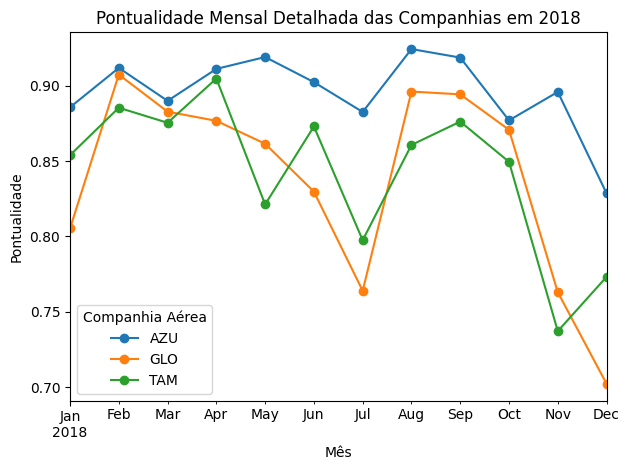

In [ ]:
import matplotlib.pyplot as plt

# Pivotar a tabela para ter a pontualidade de cada companhia por mês
tabela_pivot = tabela_agrupada.pivot(index='Mês', columns='ICAO Empresa Aérea', values='Pontualidade')

# Criar o gráfico de linhas
tabela_pivot.plot(kind='line', marker='o')

# Ajustar títulos, rótulos e fazer o plot
plt.title('Pontualidade Mensal Detalhada das Companhias em 2018')
plt.xlabel('Mês')
plt.ylabel('Pontualidade')
plt.legend(title='Companhia Aérea')
plt.tight_layout()
plt.show()

## Gráfico de Linhas - Pontualidade Mensal das Companhias em 2018

Este gráfico mostra a evolução da pontualidade das três principais companhias aéreas (Azul, Gol, TAM) ao longo do ano de 2018.

- **Desempenho Geral**: A Azul (AZU) apresentou os melhores índices de pontualidade na maioria dos meses, enquanto Gol (GLO) e TAM tiveram desempenhos mais próximos entre si.
- **Padrões Sazonais**: Todas as companhias apresentaram queda na pontualidade em julho e no final do ano (novembro-dezembro).
- **Pontos de Destaque**: A pior performance foi da Gol em dezembro, com pontualidade próxima a 70%. Já a Azul atingiu seu pico em agosto, chegando a cerca de 92%.
- **Consistência**: A Azul teve uma pontualidade mais estável ao longo do ano, enquanto Gol e TAM apresentaram mais variações mês a mês.

Essas observações indicam que existem padrões sazonais comuns às companhias, mas também variações específicas que diferenciam o desempenho de cada uma.


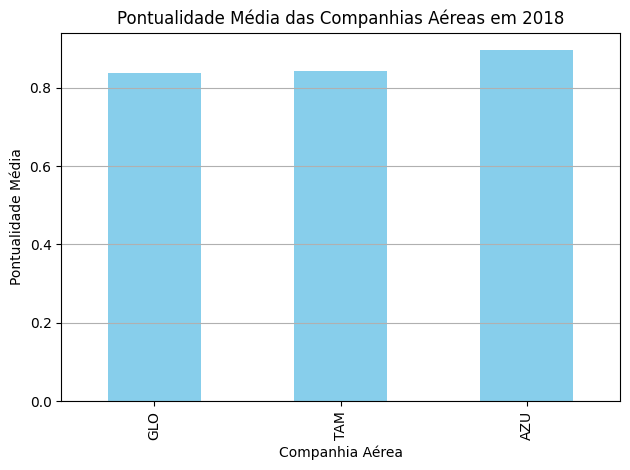

In [ ]:
media_pontualidade = tabela_agrupada.groupby('ICAO Empresa Aérea')['Pontualidade'].mean().sort_values()

media_pontualidade.plot(kind='bar', color='skyblue')
plt.title('Pontualidade Média das Companhias Aéreas em 2018')
plt.xlabel('Companhia Aérea')
plt.ylabel('Pontualidade Média')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Gráfico de Barras - Pontualidade Média das Companhias Aéreas em 2018

Este gráfico de barras mostra a pontualidade média anual das três principais companhias aéreas brasileiras em 2018:

- **Ranking de Pontualidade**: A Azul (AZU) apresentou a melhor média anual de pontualidade, seguida pela TAM e, por fim, pela Gol (GLO).
- **Diferenças Pequenas**: Embora existam diferenças no desempenho, todas as companhias mantiveram uma pontualidade média acima de 80%, indicando um bom nível de serviço.
- **Confirmação de Tendências**: Este gráfico complementa o gráfico de linhas anterior, confirmando que a Azul teve consistentemente a melhor pontualidade ao longo do ano.

Esses resultados reforçam que, apesar das variações mensais observadas, todas as companhias apresentaram um desempenho satisfatório, mantendo um nível elevado de pontualidade.


<Figure size 1200x600 with 0 Axes>

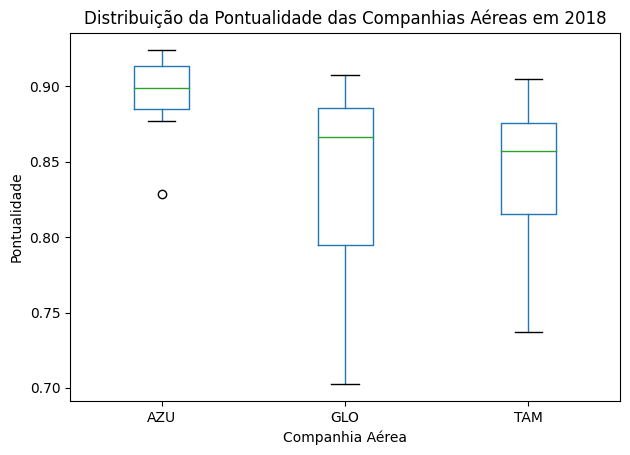

In [ ]:
plt.figure(figsize=(12, 6))
tabela_agrupada.boxplot(column='Pontualidade', by='ICAO Empresa Aérea', grid=False)

plt.title('Distribuição da Pontualidade das Companhias Aéreas em 2018')
plt.suptitle('')
plt.xlabel('Companhia Aérea')
plt.ylabel('Pontualidade')
plt.tight_layout()
plt.show()

## Boxplot - Distribuição da Pontualidade das Companhias Aéreas em 2018

Este boxplot mostra a distribuição da pontualidade das três companhias ao longo de 2018:

- **Azul (AZU)**: Apresenta a menor variabilidade e a mediana mais alta, indicando maior consistência na pontualidade.
- **Gol (GLO)**: Exibe a maior variabilidade, com uma amplitude maior de pontualidade. A mediana está em torno de 86%, mostrando instabilidade em relação às outras companhias.
- **TAM**: Tem variabilidade intermediária e mediana de cerca de 85%, mostrando um desempenho mais estável do que a Gol, mas inferior ao da Azul.

Este gráfico reforça que a Azul, além de ter a maior pontualidade média, também demonstra maior consistência, enquanto Gol e TAM apresentam maiores variações.


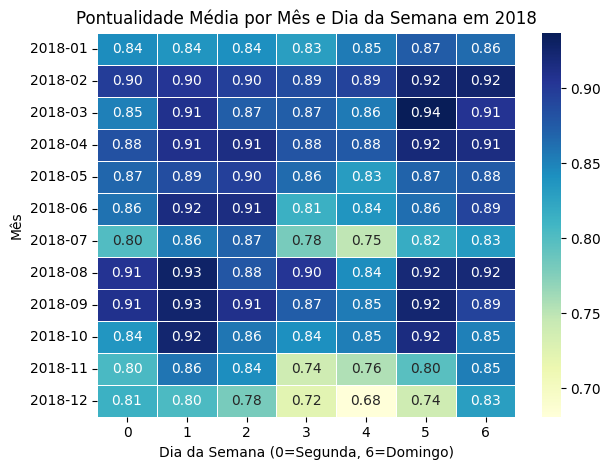

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adicionar a coluna de dia da semana
df_final_nacional['Dia da Semana'] = df_final_nacional['Partida Prevista'].dt.dayofweek

# Calcular a pontualidade média (Pontualidade = 1 - Proporção de atrasos) por mês e dia da semana. OBS: A média nos diz a proporção de atrasos
heatmap_data = df_final_nacional.groupby(['Mês', 'Dia da Semana'])['Atraso'].mean().unstack()

# Criar o heatmap.
sns.heatmap(1 - heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5)

plt.title('Pontualidade Média por Mês e Dia da Semana em 2018')
plt.xlabel('Dia da Semana (0=Segunda, 6=Domingo)')
plt.ylabel('Mês')
plt.tight_layout()
plt.show()


## Heatmap - Pontualidade Média por Mês e Dia da Semana em 2018

Este heatmap mostra a pontualidade média das companhias ao longo dos meses e dias da semana em 2018:

- **Padrões Semanais**: Terças-feiras apresentaram melhor pontualidade, enquanto finais de semana (sábados e domingos) tiveram uma performance mais variada.
- **Padrões Sazonais**: Os melhores meses foram agosto e setembro, enquanto dezembro apresentou os piores índices, especialmente nas quintas e sextas-feiras.
- **Pontos Críticos**: O pior desempenho ocorreu em dezembro, nas sextas-feiras (68%), indicando uma possível necessidade de atenção operacional nesse período.

Esta visualização ajudou a identificar padrões sazonais e semanais que podem afetar a pontualidade, sendo bastante útil para a formulação das hipóteses.


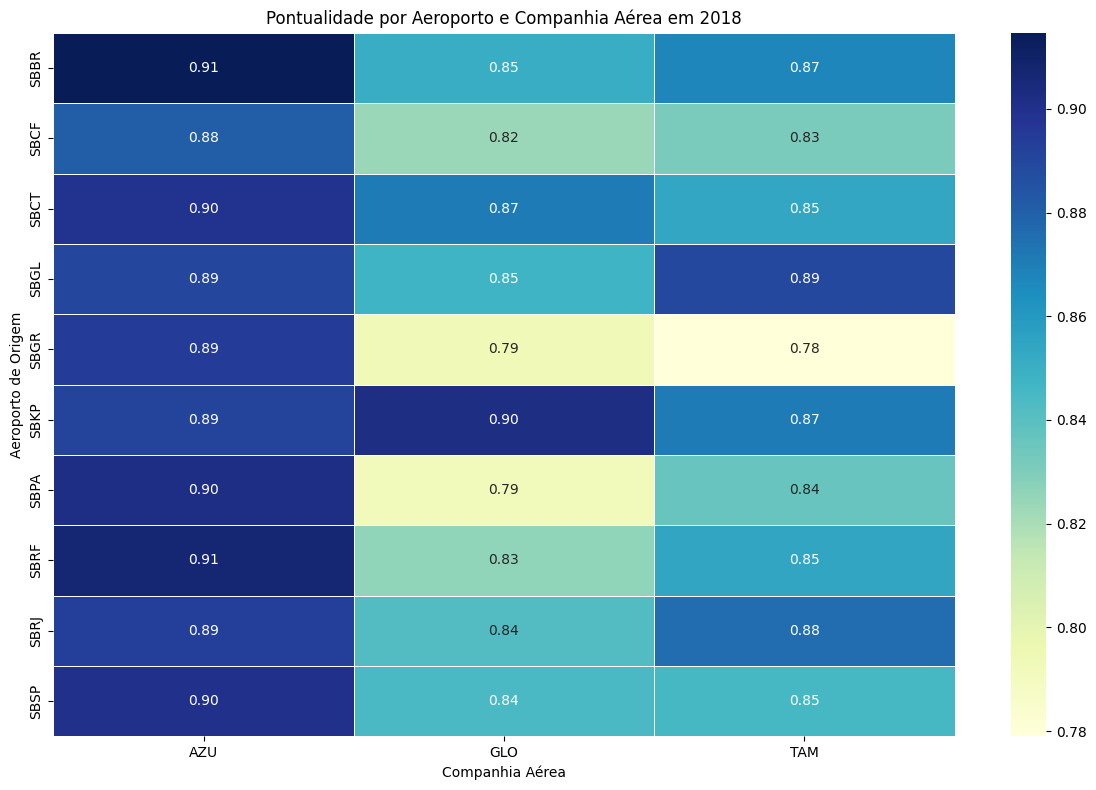

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Selecionar os principais aeroportos de origem (por número de voos)
aeroportos_top = df_final_nacional['ICAO Aeródromo Origem'].value_counts().head(10).index

# Filtrar o DataFrame para os principais aeroportos
df_top_aeroportos = df_final_nacional[df_final_nacional['ICAO Aeródromo Origem'].isin(aeroportos_top)]

# Criar a tabela agregada por aeroporto e companhia aérea
tabela_aeroporto = df_top_aeroportos.groupby(['ICAO Aeródromo Origem', 'ICAO Empresa Aérea']).agg(
    voos_realizados=('Atraso', 'count'),
    voos_atrasados=('Atraso', 'sum')
).reset_index()

# Adicionar a coluna de pontualidade
tabela_aeroporto['Pontualidade'] = 1 - (tabela_aeroporto['voos_atrasados'] / tabela_aeroporto['voos_realizados'])

# Criar a tabela pivotada para o heatmap
heatmap_data = tabela_aeroporto.pivot_table(
    index='ICAO Aeródromo Origem',
    columns='ICAO Empresa Aérea',
    values='Pontualidade'
)

# Criar o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)

# Ajustar títulos e rótulos
plt.title('Pontualidade por Aeroporto e Companhia Aérea em 2018')
plt.xlabel('Companhia Aérea')
plt.ylabel('Aeroporto de Origem')
plt.tight_layout()

# Mostrar o gráfico
plt.show()



## Heatmap - Pontualidade por Aeroporto e Companhia Aérea em 2018

Este heatmap mostra a pontualidade média por aeroporto e companhia aérea em 2018:

- **Performance por Companhia**: A Azul (AZU) manteve consistentemente os melhores índices em todos os aeroportos, enquanto a Gol (GLO) apresentou maior variabilidade e a TAM teve uma performance intermediária.
- **Destaques por Aeroporto**: O aeroporto de Brasília (SBBR) apresentou as melhores pontuações gerais, enquanto o aeroporto de Roraima (SBRR) teve os menores índices, especialmente para a Gol e a TAM.
- **Padrões Notáveis**: A Azul mantém pontualidade acima de 88% em todos os aeroportos, enquanto a Gol tem uma maior variação de desempenho, indicando desafios operacionais em certos locais.


In [ ]:
# Calcular estatísticas descritivas por companhia aérea
estatisticas_companhia = tabela_agrupada.groupby('ICAO Empresa Aérea')['Pontualidade'].agg(
    média='mean',
    mediana='median',
    desvio_padrão='std',
    mínimo='min',
    máximo='max'
).reset_index()

# Exibir as estatísticas descritivas por companhia aérea
print("Estatísticas descritivas por companhia aérea:")
print(estatisticas_companhia)


Estatísticas descritivas por companhia aérea:
  ICAO Empresa Aérea     média   mediana  desvio_padrão    mínimo    máximo
0                AZU  0.895629  0.899162       0.026271  0.828642  0.924356
1                GLO  0.837847  0.866174       0.065488  0.702274  0.907436
2                TAM  0.842361  0.857345       0.050230  0.737186  0.904797


In [ ]:
# Calcular estatísticas descritivas por mês
estatisticas_mes = tabela_agrupada.groupby('Mês')['Pontualidade'].agg(
    média='mean',
    mediana='median',
    desvio_padrão='std',
    mínimo='min',
    máximo='max'
).reset_index()

# Exibir as estatísticas descritivas por mês
print("\nEstatísticas descritivas por mês:")
print(estatisticas_mes)


Estatísticas descritivas por mês:
        Mês     média   mediana  desvio_padrão    mínimo    máximo
0   2018-01  0.848331  0.853942       0.040484  0.805334  0.885717
1   2018-02  0.901581  0.907436       0.014159  0.885433  0.911874
2   2018-03  0.882755  0.882824       0.007269  0.875451  0.889990
3   2018-04  0.897580  0.904797       0.018332  0.876738  0.911204
4   2018-05  0.867286  0.861535       0.049155  0.821260  0.919064
5   2018-06  0.868380  0.872986       0.036549  0.829746  0.902408
6   2018-07  0.814702  0.797527       0.061169  0.763956  0.882623
7   2018-08  0.893757  0.896166       0.031872  0.860748  0.924356
8   2018-09  0.896415  0.894309       0.021318  0.876228  0.918708
9   2018-10  0.865798  0.870814       0.014419  0.849541  0.877040
10  2018-11  0.798710  0.763028       0.085169  0.737186  0.895916
11  2018-12  0.768048  0.773228       0.063343  0.702274  0.828642


## Passo 4: Hipóteses a Serem Testadas

Com base na análise descritiva e nas visualizações realizadas, foram formuladas algumas hipóteses iniciais que serão testadas na etapa de modelagem preditiva. A seguir, apresentamos as principais hipóteses identificadas, considerando o conjunto de variáveis disponíveis e a necessidade de melhorias específicas para a GOL.

### 1. Impacto da Sazonalidade nos Atrasos
- **Hipótese**: A pontualidade média dos voos é significativamente menor durante os meses de alta temporada (julho e dezembro), independentemente da companhia aérea.
- **Justificativa**: Observou-se que a média de pontualidade caiu para 77% em dezembro e 81% em julho, os piores meses do ano. Isso sugere uma pressão operacional maior durante esses meses, possivelmente devido ao aumento da demanda e à sobrecarga de infraestrutura. Para a GOL, isso representa um desafio específico na preparação para os períodos de maior movimento.
- **Próximo Passo**:
  - Criar uma variável binária indicando alta temporada (sim/não) e incluí-la no modelo de classificação.
  - Avaliar a relevância dessa variável durante o treinamento para identificar se a sazonalidade contribui significativamente para atrasos.

### 2. Diferença de Pontualidade Entre Companhias Aéreas
- **Hipótese**: A pontualidade média varia entre as companhias aéreas, com a Azul apresentando uma performance mais estável em comparação com a GOL e a LATAM.
- **Justificativa**: Na análise descritiva, a Azul mostrou uma média de pontualidade de 90%, enquanto GOL e LATAM ficaram em torno de 84%, sugerindo uma possível vantagem operacional da Azul. Esse tipo de análise pode ajudar a GOL a identificar práticas de excelência e a adaptá-las para melhorar seu desempenho.
- **Próximo Passo**:
  - Incluir a variável de companhia aérea no modelo.
  - Analisar sua importância nas previsões para verificar se as diferenças operacionais entre as companhias afetam de fato os atrasos. A GOL pode usar essa análise para traçar estratégias que reduzam a diferença de performance em relação às concorrentes.

### 3. Atrasos Mais Frequentes às Quintas-Feiras
- **Hipótese**: A pontualidade é consistentemente mais baixa às quintas-feiras, independentemente do mês ou da companhia aérea.
- **Justificativa**: O gráfico de calor indicou que as quintas-feiras apresentam uma média de pontualidade mais baixa, o que pode estar associado ao acúmulo de ajustes operacionais ou à alta carga de voos durante o meio da semana. .
- **Próximo Passo**:
  - Incluir a variável de dia da semana no modelo.
  - Realizar uma análise específica para entender o efeito das quintas-feiras nos atrasos e monitorar sua relevância no modelo, buscando estratégias para mitigar os fatores que prejudicam a pontualidade.

### 4. Impacto de Aeroportos de Alto Tráfego na Pontualidade
- **Hipótese**: A pontualidade média é mais baixa nos aeroportos de maior movimento, como Guarulhos (SBGR), devido à complexidade operacional e ao volume de tráfego.
- **Justificativa**: Os dados indicam que aeroportos de grande movimento apresentam uma variação significativa de pontualidade, especialmente em períodos de pico. Isso pode ser um reflexo das condições de infraestrutura e da gestão de tráfego nesses locais. Para a GOL, isso é especialmente importante, pois estratégias para mitigar esses impactos podem melhorar substancialmente a pontualidade em rotas movimentadas.
- **Próximo Passo**:
  - Incorporar a variável de aeroporto de origem no modelo.
  - Usar análise de importância de features para quantificar o impacto de cada aeroporto na previsão de atrasos, fornecendo uma base para a GOL focar em melhorias específicas nos principais hubs.

---

Essas hipóteses foram desenvolvidas para serem testáveis na modelagem preditiva, com foco nos principais fatores observados na análise inicial. A implementação dessas variáveis no modelo permitirá validar ou refutar as hipóteses, além de fornecer uma visão mais clara dos fatores críticos para a pontualidade da GOL.

Na sequência, o próximo passo será preparar o dataset para o modelo de classificação, transformando essas variáveis em features e realizando o treinamento inicial.




## Passo 5: Preparação e Transformação de Dados no DataFrame `df_final_nacional`

Para tornar o DataFrame `df_final_nacional` mais útil para análises e para a etapa de modelagem, precisei realizar uma série de transformações. Vou detalhar aqui o que foi feito e por que cada um desses ajustes foi importante para o sucesso do projeto.

## Identificação de Alta Temporada
A primeira coisa que fiz foi criar uma nova variável chamada `Alta Temporada`. Como já vimos na análise exploratória, os meses de julho e dezembro são períodos críticos para a pontualidade dos voos. Então, essa variável foi adicionada para marcar esses meses, o que ajudará o modelo a reconhecer e ajustar para essa variação sazonal que vimos ser tão relevante.

## Extração de Informações Temporais
Uma parte essencial da análise é entender o comportamento dos voos ao longo do tempo. Para isso, extraí algumas informações temporais importantes a partir da coluna `Partida Prevista`:
- **Mês**: para identificar padrões ao longo do ano.
- **Dia da Semana**: para ver como os diferentes dias impactam a operação.
- **Hora de Partida**: para entender se há padrões específicos dependendo da hora do dia.

Essas novas colunas permitiram uma visão muito mais detalhada sobre como os horários dos voos poderiam estar afetando a pontualidade e me ajudaram a preparar melhor os dados para o modelo.

## Categorização de Períodos do Dia
Para facilitar ainda mais a análise, agrupei as horas de partida em quatro períodos do dia:
- **Manhã** (05:00 - 11:59)
- **Tarde** (12:00 - 17:59)
- **Noite** (18:00 - 23:59)
- **Madrugada** (00:00 - 04:59)

Fazer essa categorização me ajudou a simplificar a visualização dos padrões de atrasos ao longo do dia e entender se certos períodos são mais críticos para a pontualidade.

## Remoção de Colunas
Durante a preparação, decidi remover algumas colunas que não seriam úteis para a modelagem, como `Número Voo`, `Partida Prevista`, `Partida Real`, `Chegada Prevista`, `Chegada Real` e `Situação Voo`. Um insight importante foi perceber que algumas dessas colunas continham dados reais que só estariam disponíveis após a conclusão do voo. Utilizar essas informações no modelo introduziria um viés e adicionaria ruído, pois não faz sentido tentar prever atrasos usando informações que só são conhecidas após o evento.

## Codificação de Variáveis Categóricas
Como parte da preparação para a modelagem, precisei converter as colunas categóricas para um formato que o modelo conseguisse entender. Para isso, utilizei One-Hot Encoding em variáveis como `Código DI`, `ICAO Empresa Aérea`, `ICAO Aeródromo Origem`, `ICAO Aeródromo Destino`, `Código Tipo Linha`, `Período do Dia Chegada`, `Dia Semana Partida`, `Mês Partida`, `Dia Semana Chegada` e `Período do Dia`. Assim, o modelo conseguirá lidar melhor com as categorias.

## Padronização e Conversão de Tipos
Depois de aplicar o One-Hot Encoding, padronizei todas as colunas para garantir que estivessem no tipo correto. Converti as novas colunas para o tipo inteiro para evitar problemas durante a modelagem e garantir consistência nos dados. Essa etapa de padronização é fundamental para evitar qualquer erro durante o treinamento do modelo.

---

Essas transformações garantiram que o DataFrame `df_final_nacional` estivesse otimizado e consistente, pronto para ser utilizado nos processos de modelagem preditiva.

In [ ]:
import numpy as np
import pandas as pd

# Criar a variável "Alta Temporada"
df_final_nacional['Alta Temporada'] = df_final_nacional['Partida Prevista'].dt.month.isin([7, 12]).astype(int)

# Calcular a duração prevista
df_final_nacional['Duração Prevista'] = (df_final_nacional['Chegada Prevista'] - df_final_nacional['Partida Prevista']).dt.total_seconds() / 60

# Extrair as horas dos horários de partida e chegada
df_final_nacional['Hora Partida Prevista'] = df_final_nacional['Partida Prevista'].dt.hour
df_final_nacional['Hora Chegada Prevista'] = df_final_nacional['Chegada Prevista'].dt.hour

# Categorizar a hora de partida e chegada em períodos do dia
def categorizar_hora(hora):
    if 5 <= hora < 12:
        return 'Manhã'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 24:
        return 'Noite'
    else:
        return 'Madrugada'

# Criar o período do dia com base na hora de partida e chegada prevista
df_final_nacional['Período do Dia Partida'] = df_final_nacional['Hora Partida Prevista'].apply(categorizar_hora)
df_final_nacional['Período do Dia Chegada'] = df_final_nacional['Hora Chegada Prevista'].apply(categorizar_hora)

# Extrair o dia da semana e o mês da "Partida Prevista"e o dia da semana da "Chegada Prevista"
df_final_nacional['Dia Semana Partida'] = df_final_nacional['Partida Prevista'].dt.day_name()
df_final_nacional['Dia Semana Chegada'] = df_final_nacional['Chegada Prevista'].dt.day_name()
df_final_nacional['Mês Partida'] = df_final_nacional['Partida Prevista'].dt.month_name()

# Remover colunas desnecessárias
df_final_nacional.drop(columns=['Número Voo', 'Partida Prevista', 'Partida Real',
                                'Chegada Prevista', 'Chegada Real', 'Situação Voo', 'Mês', 'Dia da Semana'], inplace=True)

# Aplicar One-Hot Encoding para as colunas categóricas, incluindo 'Período do Dia Partida' e 'Período do Dia Chegada'
df_final_nacional = pd.get_dummies(df_final_nacional,
                                   columns=['Código DI', 'ICAO Empresa Aérea',
                                            'ICAO Aeródromo Origem', 'ICAO Aeródromo Destino',
                                            'Código Tipo Linha', 'Período do Dia Partida', 'Período do Dia Chegada',
                                            'Dia Semana Partida', 'Mês Partida', 'Dia Semana Chegada'],
                                   drop_first=True)


## Passo 6: Implementação do Modelo de Classificação para Previsão de Atrasos em 2018

Nesta etapa, a ideia foi construir um modelo de classificação eficiente para prever atrasos nos voos ao longo de 2018. Busquei garantir que a abordagem fosse não apenas robusta, mas também interpretável, oferecendo insights práticos para a GOL sobre o que impacta a pontualidade.

A estruturação da modelagem envolveu preparação final dos dados, escolha do algoritmo, e uma avaliação cuidadosa do desempenho. O objetivo principal foi criar um modelo que, além de ser mais preciso que as heurísticas básicas, tivesse um recall elevado — focando na identificação da maior quantidade possível de voos atrasados.

### 6.1 Preparação do Dataset

Com a variável target ("Atraso") já definida anteriormente:

- evento = 1 = atraso
- evento = 0 = pontual (On time)

Realizei a preparação dos dados, garantindo que as variáveis independentes estivessem prontas para uso no modelo. A divisão foi feita de maneira padronizada:

- **80% para Treinamento e 20% para Teste**, mantendo a proporção das classes (`stratify=y`).

### 6.2 Estabelecimento da Baseline de Performance

Antes de implementar o modelo preditivo, criei algumas heurísticas básicas para servirem como baseline de comparação. O objetivo dessas heurísticas era estabelecer um limite mínimo de desempenho que meu modelo deveria superar, pois, se o modelo não conseguisse performar melhor que elas, sua utilidade seria questionável.

As heurísticas escolhidas foram:

1. **Prever que todos os voos chegam pontualmente (classe 0):**

   - Acurácia: 0.86
   - Precisão: 0.00
   - Recall: 0.00
   - AUC-ROC: 0.50

2. **Prever que todos os voos atrasam (classe 1):**

   - Acurácia: 0.14
   - Precisão: 0.14
   - Recall: 1.00
   - AUC-ROC: 0.50

3. **Previsão Aleatória com Probabilidade Igual à Média da Variável Target:**

   - Acurácia: 0.76
   - Precisão: 0.14
   - Recall: 0.14
   - AUC-ROC: 0.14

Os valores das métricas foram calculadas utilizando uma **Matriz de Confusão** Isso permitiu uma comparação direta com os modelos que seriam desenvolvidos posteriormente. Com esses valores em mãos, defini que a meta do meu modelo era não só superar essas heurísticas, mas também ter um recall alto, priorizando a identificação de atrasos mesmo que isso custasse um pouco na precisão.

### 6.3 Treinamento dos Modelos

Dois algoritmos de classificação foram testados: **Regressão Logística** e **XGBoost**. O objetivo foi encontrar um modelo que proporcionasse um bom equilíbrio entre precisão e recall, mas com foco em maximizar a detecção de atrasos.

Para isso, implementei um processo de ajuste de hiperparâmetros (Hyperparameter Tuning), visando aumentar o recall sem comprometer a estabilidade das previsões. Além disso, também ajustei o limiar de decisão para maximizar o recall, considerando a prioridade de identificar a maior quantidade de atrasos possível.

### 6.4 Avaliação da Performance

Para avaliar o desempenho dos modelos, utilizei várias métricas, incluindo **Acurácia**, **Precisão**, **Recall**, **F1-score** e **AUC-ROC**. Embora a métrica de recall tenha sido priorizada devido à necessidade de capturar atrasos, o **AUC-ROC** também foi um critério importante, pois oferece uma visão mais completa da performance do modelo, já que não depende do limiar de decisão.

Após identificar o modelo com melhor AUC-ROC, ajustei o limiar de decisão para maximizar o recall, garantindo que os atrasos fossem detectados de forma mais eficiente. A decisão final pelo modelo foi baseada em seu desempenho superior às heurísticas iniciais, com um recall significativamente mais alto, o que garante uma maior captura de atrasos.

Realizei uma análise da importância das variáveis tanto para o **XGBoost** quanto para a **Regressão Logística**. Utilizei visualizações de **SHAP** para ambos os modelos, complementando com a importância das features para o **XGBoost** e com o plot dos coeficientes para a **Regressão Logística**. Isso permitiu identificar quais fatores mais contribuíram para a previsão de atrasos. Para garantir consistência e clareza, o foco das análises foi direcionado ao melhor modelo, assegurando uma compreensão clara do impacto das variáveis de controle na **variável-alvo**.







---



## Passo 7: Implementação da Regressão Logística

Inicialmente, optei por utilizar a **Regressão Logística** devido à sua simplicidade e alta interpretabilidade, características fundamentais para um entendimento rápido dos principais fatores que levam a atrasos nos voos. Como um modelo linear, ela permite avaliar diretamente o impacto das variáveis, tornando mais fácil identificar quais fatores são mais relevantes para a previsão de atrasos.

A escolha também foi estratégica para lidar com o desbalanceamento dos dados, já que a Regressão Logística oferece uma abordagem mais direta para interpretar os coeficientes e validar hipóteses iniciais, como a influência de horários de pico e dias específicos da semana nos atrasos. O foco nesta etapa era obter uma base sólida de insights que orientasse ajustes futuros, permitindo também uma comparação inicial com modelos mais complexos.

Apesar de não ter o mesmo potencial de capturar relações não lineares como o XGBoost, a Regressão Logística serviu como um ponto de partida crucial para entender melhor a estrutura dos dados e estabelecer uma base de referência.


### 7.1 Estrutura do Pipeline de Modelagem

O pipeline de modelagem foi dividido em algumas etapas principais:

1. **Divisão dos Dados**: Fiz uma divisão de **80% para Treinamento** e **20% para Teste**, mantendo a proporção original das classes, utilizando a variável "Atraso" como alvo (classe 1 para atrasos e 0 para pontualidade).

2. **Pré-processamento e Normalização**: Para assegurar que os dados estivessem mais interpretáveis e que o modelo treinasse mais rápido, utilizei o **MinMaxScaler** apenas nas variáveis numéricas que não eram binárias. Com isso, consegui garantir que variáveis como Hora de Partida fossem escalonadas, enquanto variáveis binárias permanecessem inalteradas.

3. **Treinamento do Modelo**: Treinei o modelo usando a classe **SGDClassifier** (otimização com uso de gradiente estocástico), configurando-a para utilizar a função de perda logarítmica (ou seja, obter um modelo de regressao logística).

### 7.2 Avaliação Inicial do Modelo

Após o treinamento, realizei a avaliação do modelo com base nas seguintes métricas:

- **Acurácia**: 0.65
- **Precisão**: 0.22
- **Recall**: 0.59
- **F1-Score**: 0.32
- **AUC-ROC**: 0.67

Embora a acurácia tenha sido razoável, minha principal preocupação foi melhorar o **recall**, pois o objetivo era garantir que a maioria dos atrasos fosse corretamente identificada. Em comparação com as heurísticas simples, o modelo obteve um desempenho superior nas métricas de recall e precisão, destacando-se ao identificar mais atrasos corretamente e superar os benchmarks estabelecidos.

### 7.3 Ajuste do Limiar de Decisão

Para aumentar o **recall** sem comprometer significativamente a precisão, decidi ajustar o limiar de decisão do modelo. Em vez de utilizar o limiar padrão de 0,5, utilizei uma abordagem baseada na **Curva ROC** para encontrar um limiar ótimo que maximizasse a diferença entre a Taxa de Verdadeiros Positivos (TPR) e a Taxa de Falsos Positivos (FPR). Esse ajuste foi crucial para garantir que conseguíssemos capturar mais atrasos, mesmo que isso gerasse alguns falsos positivos adicionais.

O limiar ótimo encontrado foi 0,15, o que permitiu um aumento substancial no recall, embora tenha causado uma ligeira redução na precisão. Esse ajuste foi necessário para garantir que pudéssemos capturar a maior parte dos atrasos, alinhando o modelo aos objetivos principais definidos pela GOL.

[INFO] Treinamento da Regressão Logística concluído.

[INFO] Avaliação do modelo no conjunto de teste:
[INFO] Limiar Ótimo de Decisão: 0.15
Accuracy: 0.65
Precision: 0.22
Recall: 0.59
F1-Score: 0.32
AUC-ROC: 0.67


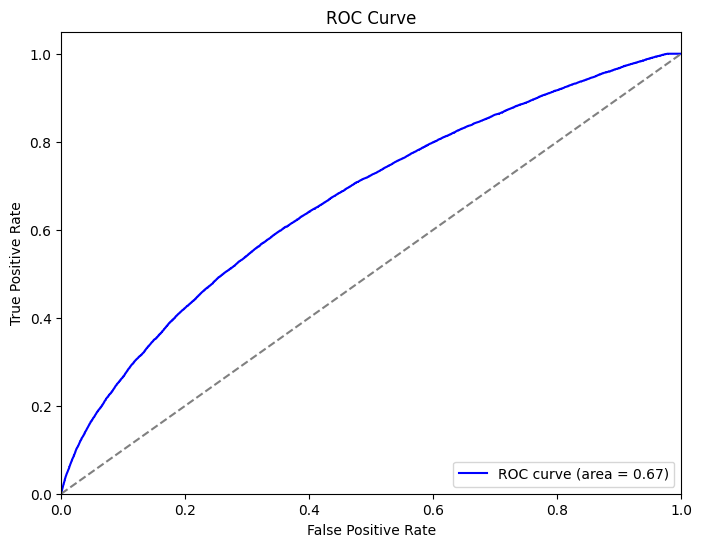

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt

# Função para dividir os dados em treino e teste
def split_data(df: pd.DataFrame, target_column: str, test_size: float = 0.2):
    """Divide os dados em conjuntos de treino e teste."""
    y = df[target_column]
    X = df.drop(columns=[target_column])
    return train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

# Função para criar e treinar um pipeline de Regressão Logística sem SMOTE
def train_pipeline(X_train, y_train, max_iter=1000):
    """Treina um pipeline de Regressão Logística"""

    # Escalando as variáveis
    tmp = X_train.describe()
    dont_scale = tmp.columns[(tmp.loc['min'] == 0) & (tmp.loc['max'] == 1)]

    # Cria um ColumnTransformer para aplicar o escalador apenas em colunas específicas
    preprocessor = ColumnTransformer(
        transformers=[
            ('minmax', MinMaxScaler(), [col for col in X_train.columns if col not in dont_scale]),
            ('passthrough', 'passthrough', dont_scale)
        ])

    # Cria o pipeline com Regressão Logística
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('lr', LogisticRegression(max_iter=max_iter, random_state=42))
    ])

    # Treina o pipeline
    pipeline.fit(X_train, y_train)
    print("[INFO] Treinamento da Regressão Logística concluído.")
    return pipeline

# Função para ajustar o limiar de decisão
def adjust_decision_threshold(y_test, y_pred_proba):
    """Ajusta o limiar de decisão para otimizar o trade-off entre precisão e recall."""
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    print(f"[INFO] Limiar Ótimo de Decisão: {optimal_threshold:.2f}")
    return optimal_threshold

# Função de avaliação com métricas e curva ROC
def evaluate_model_with_threshold(model, X_test, y_test):
    """Avalia o modelo com várias métricas de performance, plota a curva ROC e ajusta o limiar."""
    # Obter as probabilidades para a classe positiva
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Ajustar o limiar de decisão
    optimal_threshold = adjust_decision_threshold(y_test, y_pred_proba)

    # Predizer com o limiar ajustado
    y_pred = (y_pred_proba >= optimal_threshold).astype(int)

    # Calcular as métricas de avaliação
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    # Exibir as métricas
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"AUC-ROC: {auc_roc:.2f}")

    # Plotar a Curva ROC
    plot_roc_curve(y_test, y_pred_proba)

# Função para plotar a curva ROC
def plot_roc_curve(y_test, y_pred_proba):
    """Plota a Curva ROC."""
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = split_data(df_final_nacional, target_column='Atraso')

# Treinar o pipeline de Regressão Logística sem balanceamento
pipeline_lr = train_pipeline(X_train, y_train, max_iter=1000)

# Avaliar o modelo no conjunto de teste e ajustar o limiar
print("\n[INFO] Avaliação do modelo no conjunto de teste:")
evaluate_model_with_threshold(pipeline_lr, X_test, y_test)


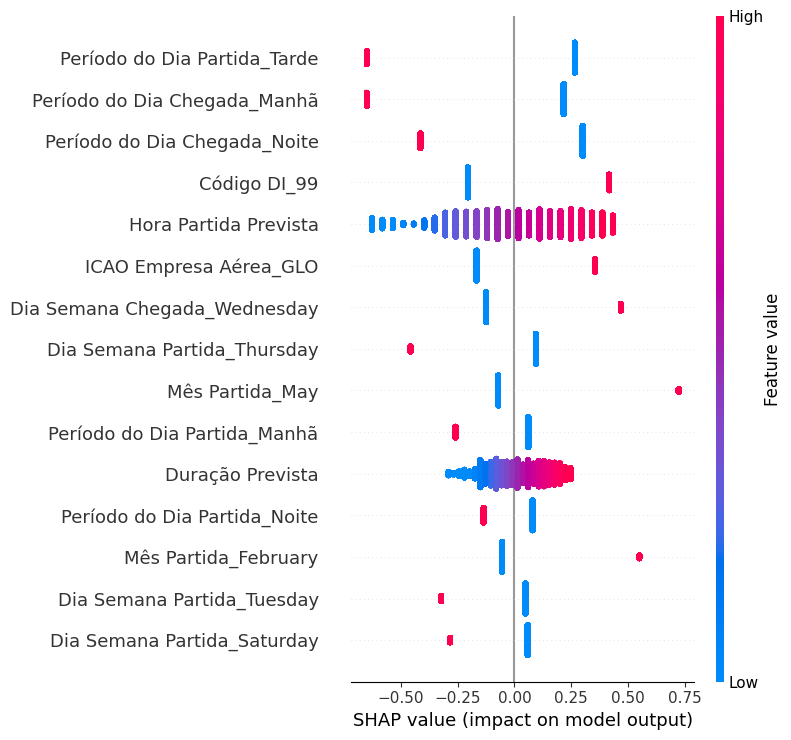

In [ ]:
import shap

def perform_shap_analysis(model, X_train, X_test, feature_names):
    """Realiza a análise SHAP e plota os valores SHAP."""
    # Obter o modelo de regressão logística e o pré-processador do pipeline
    preprocessor = model.named_steps['preprocessor']
    lr_model = model.named_steps['lr']

    # Transformar os conjuntos de treino e teste usando o pré-processador do pipeline
    X_train_scaled = preprocessor.transform(X_train)
    X_test_scaled = preprocessor.transform(X_test)

    # Ajustar o explainer para o modelo de regressão logística usando maskers.Independent
    masker = shap.maskers.Independent(X_train_scaled)
    explainer = shap.LinearExplainer(lr_model, masker=masker)
    shap_values = explainer(X_test_scaled)

    # Criar a explicação SHAP e plotar os valores
    shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names, max_display=15)

# Realizar a análise SHAP para o modelo ajustado
perform_shap_analysis(pipeline_lr, X_train, X_test, X_train.columns)


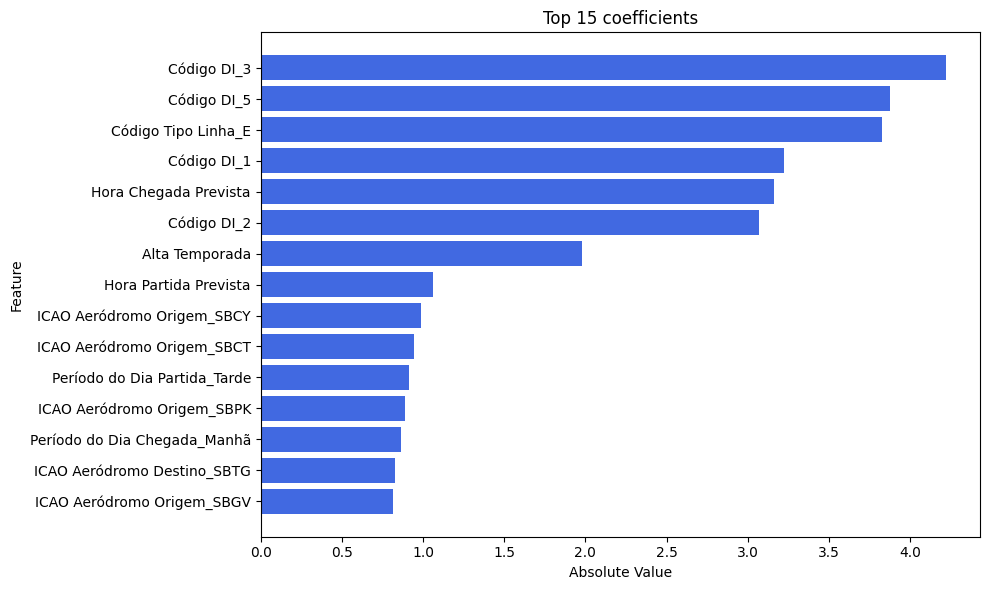

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Obter os coeficientes do modelo de regressão logística
coefs = pipeline_lr.named_steps['lr'].coef_[0]

# Criar um DataFrame para armazenar os coeficientes e os nomes das features
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(coefs)  # Usar valores absolutos dos coeficientes
})

# Ordenar os coeficientes pela importância em ordem decrescente
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Selecionar apenas as 15 principais features
top_15_features = feature_importance.head(15)

# Plotar os coeficientes das 15 principais features
plt.figure(figsize=(10, 6))
plt.barh(top_15_features['Feature'], top_15_features['Importance'], color='royalblue')
plt.xlabel('Absolute Value')
plt.ylabel('Feature')
plt.title('Top 15 coefficients')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Passo 8: Treinamento com XGBoost

Nesta etapa, decidi testar o modelo de XGBoost por sua capacidade de capturar relações não lineares entre variáveis e por ser robusto ao lidar com dados desbalanceados, algo essencial na previsão de atrasos de voos. A escolha foi motivada pelo desejo de obter uma AUC-ROC mais alta, já que essa métrica permite uma avaliação mais consistente do desempenho global, independente do limiar de decisão. No entanto, dado o foco na detecção de atrasos, também implementei um ajuste automático do limiar para maximizar o recall, garantindo que a maioria dos atrasos fosse identificada. Assim, o objetivo era alcançar um modelo com melhor desempenho geral e maior capacidade preditiva, superando os resultados dos modelos anteriores.

#### Treinamento do Modelo XGBoost

O modelo foi treinado utilizando o conjunto de treino, e as seguintes configurações de parâmetros foram utilizadas:

- **max\_depth**: 6
- **eta**: 0.3
- **objective**: 'binary:logistic'
- **eval\_metric**: 'auc'
- **n\_thread**: 4

O número de rounds de treinamento foi definido como **100**. Além disso, o limiar de decisão foi ajustado para **0.15** com o objetivo de aumentar o **recall**, priorizando a identificação do máximo de atrasos possível.

Vale ressaltar que mais parâmetros do **XGBoost** podem ser explorados, mas a ideia que tive para esse case era apenas mostrar potencial de melhoria com o modelo não linear.

#### Resultados do Modelo XGBoost

Após o treinamento e ajuste do limiar de decisão, o modelo XGBoost foi avaliado no conjunto de teste e apresentou as seguintes métricas de desempenho:

- **Acurácia**: 0.67
- **Precisão**: 0.25
- **Recall**: 0.63
- **F1-Score**: 0.36
- **AUC-ROC**: 0.71

Comparando esses resultados aos modelos anteriores:

- O **recall** aumentou para 0.63, superando tanto o modelo de Regressão Logística quanto o Random Forest, indicando que o XGBoost é mais eficaz em identificar os voos com atraso.
- A **precisão** também teve uma ligeira melhora (0.25), o que indica um desempenho superior em termos de predição correta dos atrasos.
- A **Acurácia** e o **F1-Score** mostraram um aumento comparado aos modelos anteriores, reforçando um desempenho melhor.
- O **AUC-ROC** de 0.71 indica uma melhor capacidade de discriminar entre as classes em comparação aos modelos anteriores.

Esses resultados indicam que o **XGBoost** foi o modelo que apresentou a melhor performance geral e será o modelo escolhido para as próximas etapas.

#### Próximos Passos

Com base nos resultados obtidos, o próximo passo será calcular a **Feature Importance** e os **SHAP Values** para entender o impacto de cada uma das features no modelo XGBoost. Essa análise será crucial para validar as hipóteses iniciais formuladas e entender os principais fatores que influenciam os atrasos.


[INFO] Limiar ótimo de decisão: 0.15

Métricas do XGBoost:
Accuracy: 0.67
Precision: 0.25
Recall: 0.63
F1-Score: 0.35
AUC-ROC: 0.71


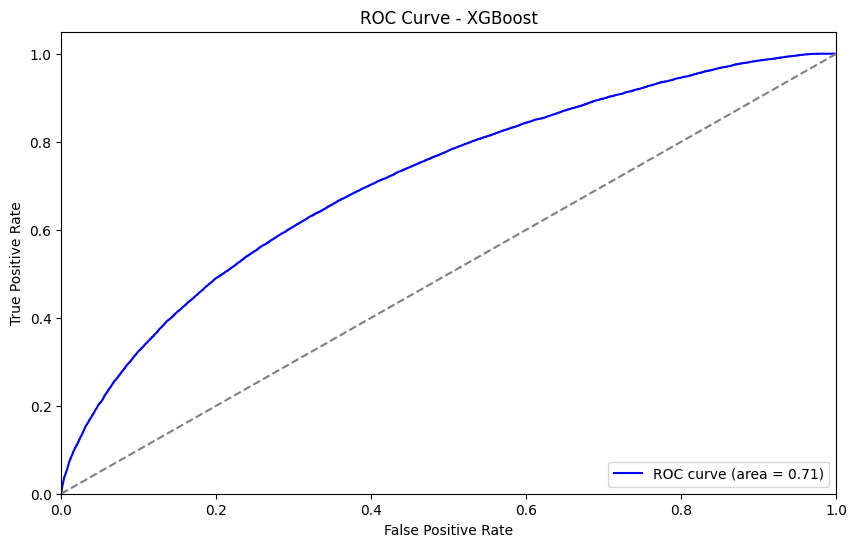

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


# Dividir os dados em treino e teste
y = df_final_nacional['Atraso']
X = df_final_nacional.drop(columns=['Atraso'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Preparar os dados para o XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Definir parâmetros do XGBoost
params = {
    'max_depth': 6,
    'eta': 0.3,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4
}

# Treinar o modelo
num_round = 100
model_xgb = xgb.train(params, dtrain, num_round)

# Fazer previsões
y_pred_proba_xgb = model_xgb.predict(dtest)

# Ajustar o limiar de decisão
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_xgb)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"[INFO] Limiar ótimo de decisão: {optimal_threshold:.2f}")

# Fazer previsões com o limiar ajustado
y_pred_xgb = (y_pred_proba_xgb >= optimal_threshold).astype(int)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
auc_roc = roc_auc_score(y_test, y_pred_proba_xgb)

# Exibir métricas
print("\nMétricas do XGBoost:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")

# Plotar curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()


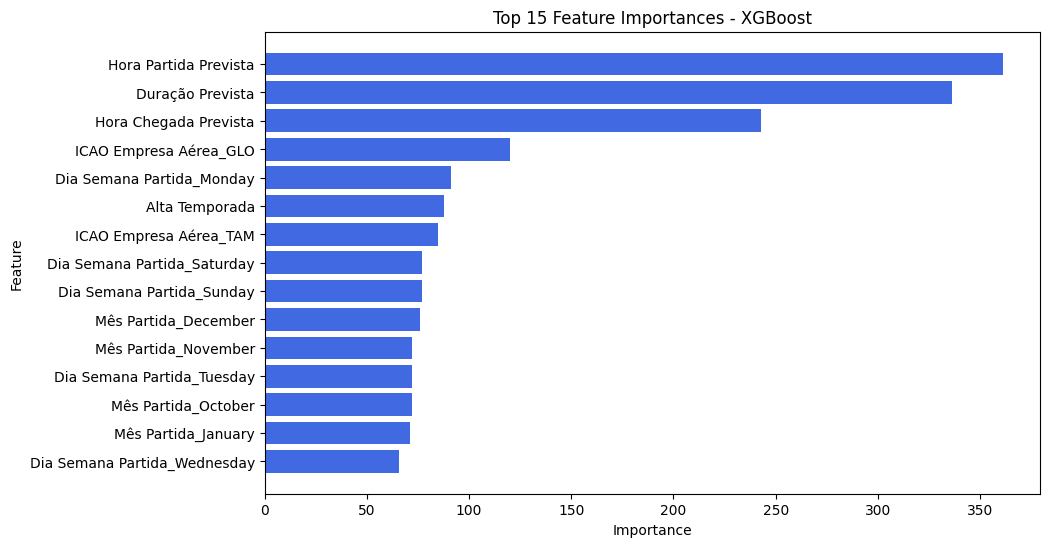

In [ ]:
# Obter importância das features

importance_scores = model_xgb.get_score(importance_type='weight')
importance_df = pd.DataFrame({
    'Feature': list(importance_scores.keys()),
    'Importance': list(importance_scores.values())
})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plotar as 15 features mais importantes
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:15], importance_df['Importance'][:15], color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importances - XGBoost')
plt.gca().invert_yaxis()
plt.show()

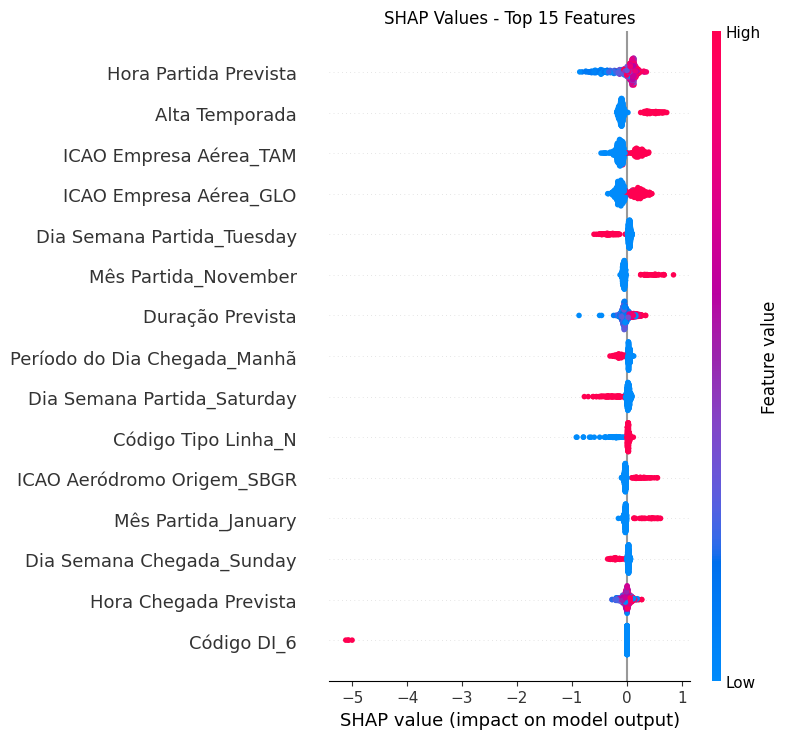

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Amostragem dos dados (usando X_test normal, não DMatrix)
n_samples = 500
if len(X_test) > n_samples:
    sample_idx = np.random.choice(len(X_test), n_samples, replace=False)
    X_sample = X_test.iloc[sample_idx].copy()
else:
    X_sample = X_test.copy()

# Criar explainer para XGBoost
explainer = shap.TreeExplainer(model_xgb)

# Calcular valores SHAP
shap_values = explainer.shap_values(X_sample)

# Plot do SHAP
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values,
    X_sample,
    max_display=15,
    show=False
)
plt.title('SHAP Values - Top 15 Features')
plt.tight_layout()
plt.show()

# Passo 9: Análise Final

Neste passo final, revisei o desempenho do modelo XGBoost, validando hipóteses e analisando o impacto das features na previsão dos atrasos. Este foi um ponto crucial para entender o que funcionou no modelo, identificar suas limitações e traçar futuras iterações para melhoria do processo.

### Análise das Hipóteses

#### H1: Horários de voo estão associados ao atraso
- **Indícios**:
  - "Hora Partida Prevista" é uma das variáveis com maior impacto no modelo XGBoost.
  - "Hora Chegada Prevista" também aparece entre as três principais variáveis.
  - Valores SHAP indicam variação significativa em horários específicos, sugerindo que determinados períodos do dia estão associados a uma maior probabilidade de atrasos, ainda que esses horários possam ser apenas intermediários às causas operacionais.

#### H2: Sazonalidade está relacionada à probabilidade de atrasos
- **Indícios**:
  - "Alta Temporada" é uma variável relevante, embora não dominante, nas análises de importância.
  - Meses específicos, como novembro e janeiro, têm importância moderada no modelo.
  - Valores SHAP indicam um impacto positivo nos atrasos durante períodos de alta temporada, apontando uma possível relação indireta, mas sem ser um fator exclusivo.

#### H3: Dias da semana estão associados os atrasos
- **Indícios**:
  - Alguns dias, como segunda-feira, sábado e domingo, aparecem entre as 15 variáveis mais influentes.
  - Valores SHAP revelam variações nos atrasos entre dias da semana, sugerindo que a frequência de atrasos pode estar associada ao dia, sem indicar causalidade direta.

#### H4: As companhias aéreas podem apresentar diferentes perfis de atraso
- **Indícios**:
  - Variáveis relacionadas ao "ICAO Empresa Aérea" (ex.: GLO e TAM) estão entre as mais influentes.
  - Valores SHAP mostram padrões distintos entre companhias, indicando que perfis de atraso podem estar associados a diferentes empresas, refletindo possíveis diferenças operacionais.

#### H5: Duração do voo estão associados com atraso
- **Indícios**:
  - "Duração Prevista" é a segunda variável mais relevante no modelo.
  - Valores SHAP sugerem que certas durações estão associadas a uma maior probabilidade de atraso, indicando que a duração pode ser uma variável intermediária importante.

#### H6: Aeroportos de origem/destino podem estar relacionados aos atrasos
- **Indícios**:
  - "ICAO Aeródromo Origem" aparece entre as variáveis relevantes, embora sua importância seja moderada em relação a outras.
  - Valores SHAP indicam algum impacto dos aeroportos de origem, mas em menor grau do que o das variáveis temporais e operacionais, sugerindo uma possível influência que deve ser investigada com cautela.


### Desempenho dos modelos - Tabela comparativa

| **Modelo/Heurística**                        | **Acurácia** | **Precisão** | **Recall** | **F1-Score** | **AUC-ROC** |
|----------------------------------------------|-------------|-------------|------------|--------------|-------------|
| Prever que todos os voos chegam pontualmente | 0.86        | 0.00        | 0.00       | -          | 0.50        |
| Prever que todos os voos atrasam             | 0.14        | 0.14        | 1.00       | -          | 0.50        |
| Previsão Aleatória                           | 0.50        | 0.14        | 0.50       | -          | 0.50        |
| Regressão Logística                          | 0.65        | 0.22        | 0.59       | 0.32         | 0.67        |
| **XGBoost**                                      | **0.67**        | **0.25**        | **0.63**       | **0.36**         | **0.71**        |

### Comparação Rápida

Os modelos de **Regressão Logística** e **XGBoost** superaram todas as heurísticas em quase todas as métricas (Excessão acurácia), apresentando **melhor AUC-ROC** e um equilíbrio entre **precisão** e **recall**. O XGBoost obteve a maior AUC-ROC (0.71), indicando uma capacidade preditiva mais consistente, enquanto o ajuste do limiar de decisão também permitiu aumentar o recall em ambos os modelos, especialmente no XGBoost (0.63).


#### Interpretação dos Resultados
- **Pontos Fortes**: O recall de 0,63 mostra que o modelo consegue identificar 63% dos atrasos reais, um resultado satisfatório em um contexto onde minimizar atrasos não previstos é crucial. A AUC-ROC de 0,71 indica capacidade moderada de discriminar entre voos que atrasam e os que não atrasam, independentemente do limiar de decisão.
- **Pontos de Atenção**: A baixa precisão (0,25) reflete um número alto de falsos positivos, sugerindo que o modelo está sendo excessivamente cauteloso. Este comportamento pode levar ao desperdício de recursos e a uma experiência negativa para o cliente, tornando-se um desafio para a aplicação prática. Além disso, o limiar baixo (0,15) foi ajustado para priorizar a identificação de atrasos, reforçando a necessidade de adaptação conforme o contexto do negócio.

### Justificativa da Escolha do XGBoost

- Decidi seguir com o modelo XGBoost devido às suas características únicas e adequação ao tipo de dados e ao problema em questão. O XGBoost adota uma abordagem que combina estimadores fracos não lineares, permitindo capturar relações complexas nos dados de maneira mais eficaz. Essa capacidade é especialmente relevante para identificar interações não lineares entre variáveis, algo que modelos mais simples, como a regressão logística, não conseguem captar adequadamente. A escolha pelo XGBoost foi estratégica, pois ele consegue capturar melhor a variância do dataset, ainda que isso venha ao custo de um leve aumento no viés.

- Durante o desenvolvimento, percebi que o modelo apresentou um recall significativo, o que foi positivo para capturar a maior quantidade possível de atrasos reais. No entanto, é preciso ressaltar que tanto a precisão quanto o recall foram obtidos de forma arbitrária, já que dependem diretamente do limiar de decisão utilizado. Ajustar esse limiar pode alterar o balanceamento entre as duas métricas, de acordo com o objetivo do negócio. Por exemplo, um limiar mais alto poderia reduzir falsos positivos e melhorar a precisão, enquanto um limiar mais baixo aumenta o recall, capturando mais atrasos ao custo de prever atrasos onde não existem. Nesse sentido, é fundamental destacar que o limiar deve ser adaptado conforme o uso prático do modelo, pois simplesmente ter um alto recall sem considerar a aplicação operacional pode não agregar o valor esperado. A decisão sobre o limiar precisa ser estratégica, levando em conta as restrições e prioridades do negócio, como custos de false positives ou impacto na experiência do cliente.

- Além disso, para comparar o desempenho de modelos, utilizei a métrica AUC-ROC, pois ela é independente do limiar de decisão. A AUC-ROC oferece uma visão mais estável e confiável da capacidade discriminativa do modelo, permitindo avaliar sua eficácia sem as variações introduzidas pelo ajuste do limiar. Essa escolha é especialmente importante neste contexto, já que a AUC-ROC oferece uma medida mais consistente para decidir se o modelo está adequado ou se precisa de ajustes adicionais.

- Portanto, o XGBoost não foi apenas eficaz para o problema atual, mas também mostrou ser flexível o suficiente para futuras iterações. A capacidade de ajustar o limiar de decisão para maximizar o impacto do modelo na operação é uma das suas maiores vantagens, tornando-o uma ferramenta adaptável e que pode realmente agregar valor à tomada de decisões na previsão de atrasos

#### Considerações de Implementação

- Ao considerar a logística de implementação dos modelos, é importante observar que a **Regressão Logística** é mais simples e rápida de implementar, além de exigir menos recursos computacionais. Isso a torna uma opção viável para aplicações onde a transparência e a facilidade de manutenção são mais importantes do que a complexidade das interações não lineares.

- Por outro lado, o **XGBoost** requer mais esforço de ajuste e maior poder computacional para treinamento e deploy, especialmente em datasets maiores. Embora seja mais difícil de interpretar e monitorar, ele oferece um ganho substancial em termos de performance, particularmente em problemas com relações não lineares entre as variáveis.

- A escolha entre os dois modelos depende das necessidades operacionais e das restrições técnicas do ambiente de produção. Se a prioridade for rapidez de implementação e interpretabilidade, a Regressão Logística é uma escolha mais prática. Já se o objetivo for maximizar o desempenho preditivo e capturar a complexidade dos dados, o XGBoost é uma solução mais robusta, ainda que exija mais planejamento e recursos para o deploy.

### Sugestões de Melhorias
#### 1. **Engenharia de Features**
- Criar features de interação entre horários e temporadas.
- Adicionar dados históricos de atrasos por rota.
- Incluir variáveis meteorológicas para captar melhor os efeitos da sazonalidade.

#### 2. **Dados Adicionais**
- Incluir dados de manutenção das aeronaves.
- Incorporar informações de congestionamento dos aeroportos e histórico de eventos que impactam voos.

#### 3. **Processo de Validação**
- Implementar validação cruzada temporal para capturar variações sazonais.
- Avaliar métricas específicas por rota/aeroporto e considerar custos de negócio para falsos positivos e negativos.
- Implementar monitoramento contínuo do modelo em produção para garantir que seu desempenho seja mantido ao longo do tempo.

#### 4. **Momento de Execução do Modelo**  
- Seria interessante definir qual o melhor momento para a implementação desse modelo. Podendo testar essa abordagem em produção, com modelos rodando em paralelo, para avaliar o desempenho em diferentes prazos de antecedência e determinar a configuração mais eficaz.

### **Conclusão e Ações recomendadas**

Com base nos resultados finais do modelo, uma estratégia eficaz para melhorar a gestão operacional dos voos é focar na identificação dos voos de maior risco, aqueles que apresentam uma alta probabilidade de atraso de acordo com as previsões do modelo. Ao separar os voos mais arriscados, é possível direcionar as equipes para ações mais específicas e priorizar recursos, aumentando a eficiência e reduzindo os impactos operacionais.

A proposta é classificar os voos de acordo com percentis de risco, utilizando um limiar de decisão adequado para categorizar os voos com maior probabilidade de atraso. Por exemplo, ao utilizar um limiar de 0,15, os voos acima desse valor são considerados "alto risco", permitindo uma segmentação mais precisa. A partir daí, o top X% dos voos classificados como de maior risco pode ser agrupado e tratado de maneira diferenciada, com medidas específicas para mitigar atrasos.

#### Ações Recomendadas para os dos Voos de Alto Risco:

1. **Top 5% - Ações Intensivas (Risco Alto)**
   Os voos com maior probabilidade de atraso requerem atenção imediata e ações personalizadas para minimizar os riscos operacionais.
   
   - **Revisões Operacionais Prioritárias**: Realizar revisões operacionais antes do horário de partida para verificar eventuais problemas de documentação, carga ou manutenção.
   - **Reforço na Comunicação com a Tripulação**: Informar a tripulação sobre a alta probabilidade de atraso, para que possam estar preparados e realizar ajustes necessários no planejamento de voo.
   - **Acompanhamento em Tempo Real**: Garantir monitoramento contínuo desses voos, com atualizações frequentes sobre status de decolagem e condições climáticas.
   - **Alocação de Recursos de Backup**: Preparar aeronaves e tripulações de backup para rápida substituição em caso de problemas detectados antes da decolagem.

2. **Top 20% - Ações Moderadas (Risco Moderado)**
   Este grupo ainda apresenta um risco significativo, mas as ações podem ser menos intensivas, focando em melhorias estruturais que reduzam os riscos de atraso.
   
   - **Inspeções de Manutenção Pré-voo**: Aumentar a frequência de inspeções de manutenção para esses voos, buscando prevenir atrasos por falhas técnicas.
   - **Ajustes na Logística de Embarque**: Reforçar o processo de embarque, alocando mais funcionários para agilizar o embarque e evitar atrasos no horário de partida.
   - **Comunicação Proativa com Passageiros**: Informar passageiros sobre possíveis atrasos antes da chegada ao aeroporto, reduzindo o impacto na experiência do cliente.

3. **Grupo de Monitoramento Básico (Risco Baixo, mas Relevante)**
   Embora o risco de atraso seja menor, é importante monitorar este grupo de voos para garantir a manutenção da eficiência operacional e antecipar problemas futuros.
   
   - **Monitoramento de Desempenho Operacional**: Realizar análises periódicas de desempenho para garantir que as operações estejam de acordo com as expectativas.
   - **Manter a Comunicação Aberta com a Tripulação**: Promover reuniões regulares com a tripulação para discutir estratégias de eficiência e comunicação proativa.
   - **Feedback Estrutural**: Coletar dados de feedback das operações e implementar melhorias contínuas nos processos de logística e embarque.

---

### Resumo das Ações por Percentil:

| Percentil (Risco)      | Ações                                                     |
|------------------------|-----------------------------------------------------------|
| **Top 5%** (Risco Alto)| Revisões Operacionais, Comunicação com Tripulação, Monitoramento em Tempo Real, Backup de Recursos  |
| **Top 20%** (Risco Moderado)| Inspeções de Manutenção, Ajustes Logísticos, Comunicação Proativa com Passageiros   |
| **Monitoramento Básico** (Risco Baixo)| Monitoramento Operacional, Reuniões de Eficiência, Coleta de Feedback   |

---



## Desafio 2: Compra de Novas Aeronaves

Para formular o problema como um modelo de programação linear, definimos as seguintes variáveis de decisão:

- \( x \): número de aeronaves Ac a serem compradas.
- \( y \): número de aeronaves Am a serem compradas.
- \( z \): número de aeronaves Al a serem compradas.

### Objetivo

Maximizar o lucro total anual \( P \) (em milhões de euros):

$$
\text{Maximizar } P = 190x + 220y + 310z
$$

### Restrições

1. **Restrição de Orçamento**  
   O custo total de aquisição não pode exceder o orçamento disponível de 120.000 milhões de euros:

   $$
   2100x + 4000y + 5200z \leq 120000
   $$

2. **Restrição de Capacidade Operacional**  
   A GOL pode operar no máximo 25 aeronaves novas com o quadro atual de comandantes:

   $$
   x + y + z \leq 25
   $$

3. **Restrição de Capacidade de Manutenção**  
   A capacidade de manutenção equivale a 36 aeronaves Ac. Como um Am equivale a 4/3 Ac e um Al equivale a 5/3 Ac, temos:

   $$
   x + \frac{4}{3}y + \frac{5}{3}z \leq 36
   $$

   Podemos multiplicar todos os termos por 3 para eliminar os denominadores:

   $$
   3x + 4y + 5z \leq 108
   $$

4. **Restrição de Compra entre Ac e Am/Al**  
   Para cada aeronave Ac(x) comprada, é necessário comprar pelo menos uma aeronave Am(y) ou Al(z)

   $$
   x \leq y + z
   $$

5. **Restrição do Fornecedor**  
   Ao comprar aeronaves Al(z), devem ser compradas pelo menos 7 aeronaves Ac(x) ou Am(y) para cada Al(z):

   $$
   x + y \geq 7z
   $$

6. **Restrição de Não-Negatividade**  
   As variáveis de decisão não podem ser negativas:

   $$
   x \geq 0, \quad y \geq 0, \quad z \geq 0
   $$

### Modelo Completo

$$
\begin{aligned}
\text{Maximizar } & P = 190x + 220y + 310z \\
\text{sujeito a:} \\
& 2100x + 4000y + 5200z \leq 120000 \quad \text{(Orçamento)} \\
& x + y + z \leq 25 \quad \text{(Capacidade Operacional)} \\
& 3x + 4y + 5z \leq 108 \quad \text{(Capacidade de Manutenção)} \\
& x \leq y + z \quad \text{(Compra de Ac e Am/Al)} \\
& x + y \geq 7z \quad \text{(Restrição do Fornecedor)} \\
& x \geq 0, \quad y \geq 0, \quad z \geq 0 \quad \text{(Não-Negatividade)}
\end{aligned}
$$


In [ ]:
!apt-get install -y texlive-xetex
!apt-get install -y pandoc
!jupyter nbconvert --to pdf "/content/sample_data/Case_GOL.ipynb"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
[NbConvertApp] Converting notebook /content/sample_data/Case_GOL.ipynb to pdf
[WARNING] Could not parse YAML metadata at line 37 column 1: Lexical error near "Ap\243s a prepara\231\227o e a limpeza dos dados, o pr\243ximo passo foi agregar as informa\231\245es dispon\237veis e realizar a an\225lise explorat\243ria a partir das visualiza\231\245es geradas. Esta etapa envolve resumir os dados em diferentes n\237veis, como por m\234s ou por companhia a\233rea, e gerar visualiza\231\245es que permitam identificar padr\245es, sazonalidades, e caracter\237st

In [ ]:
!ls

sample_data
